<a href="https://colab.research.google.com/github/siri2511/Speech-Processing/blob/main/ShortTimeEnergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

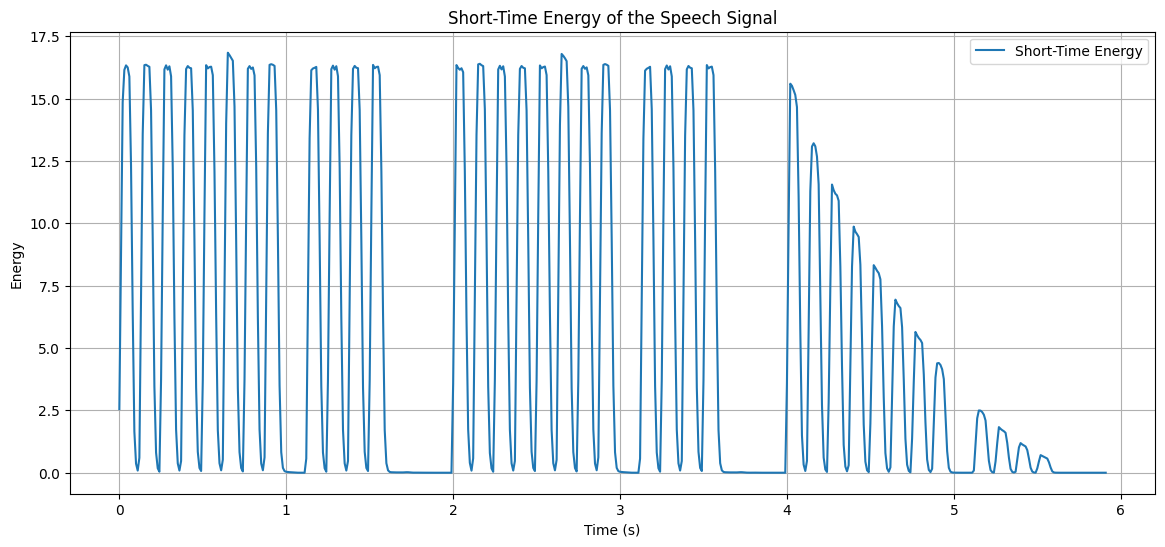

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def short_time_energy(signal, frame_length, hop_length):
    """
    Compute short-time energy of a given signal.

    Parameters:
    signal (numpy array): The input speech signal.
    frame_length (int): The length of each frame.
    hop_length (int): The number of samples to shift between frames.

    Returns:
    energy (numpy array): Short-time energy of the signal.
    """
    energy = []
    # Calculate energy for each frame
    for i in range(0, len(signal) - frame_length, hop_length):
        frame = signal[i:i + frame_length]
        frame_energy = np.sum(frame ** 2)
        energy.append(frame_energy)
    return np.array(energy)

# Load a speech signal from a file
filename = '/content/example_WAV.wav'  # Replace with your speech file path
# Load the signal with librosa
signal, sample_rate = librosa.load(filename, sr=None)

# Define frame and hop lengths
frame_length = int(0.025 * sample_rate)  # 25 ms frame length
hop_length = int(0.010 * sample_rate)    # 10 ms hop length

# Compute short-time energy
energy = short_time_energy(signal, frame_length, hop_length)

# Time axis for plotting energy
frames = np.arange(len(energy))
time = librosa.frames_to_time(frames, sr=sample_rate, hop_length=hop_length)

# Plot the short-time energy
plt.figure(figsize=(14, 6))
plt.plot(time, energy, label='Short-Time Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy of the Speech Signal')
plt.legend()
plt.grid()
plt.show()
